<a href="https://colab.research.google.com/github/tharun067/python_problems/blob/main/NLP_AD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
text = ['Sarah lives in a hut in the village.',
        'She has an apple tree in her backyard.',
        'The apples are red in color.']
df = pd.DataFrame(text,columns=['Sentence'])
df

,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in color.


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])

In [ ]:
token

[['Sarah', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'color', '.']]

In [ ]:
pos

[['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df['token'] =token
df['pos'] = pos

In [ ]:
df.head()

,Sentence,token,pos
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in color.,"[The, apples, are, red, in, color, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
df['noun'] =df.apply(lambda x:x['pos'].count('NOUN'),axis=1)
df['verb'] =df.apply(lambda x:x['pos'].count('VERB'),axis=1)
df['adj'] =df.apply(lambda x:x['pos'].count('ADJ'),axis=1)
df['punct'] =df.apply(lambda x:x['pos'].count('PUNCT'),axis=1)
df

,Sentence,token,pos,noun,verb,adj,punct
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ...",2,1,0,1
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...",3,1,0,1
2,The apples are red in color.,"[The, apples, are, red, in, color, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]",2,0,1,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:
def rating(rating):
  if rating >3 and rating <=5:
    return "Positive"
  if rating > 0 and rating <=3:
    return "Negative"
df['Rating_Category'] = df['Rating'].apply(rating)

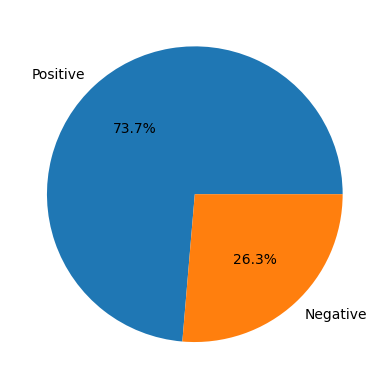

In [ ]:
plt.pie(df['Rating_Category'].value_counts(),
        labels=df['Rating_Category'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [ ]:
lenght = len(df['Review'][0])
print(f'lenght of first review: {lenght}')

lenght of first review: 593


In [ ]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Rating_Category,Length
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281


In [ ]:
word_count = df['Review'][0].split()
print(f'word count of first review: {len(word_count)}')

word count of first review: 87


In [ ]:
def word_count(review):
  review_list = review.split()
  return len(review_list)
df['Word_Count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Rating_Category,Length,Word_Count
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191


In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev :np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Rating_Category,Length,Word_Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,5.701571


In [ ]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

591.0

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev :np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head()

,Review,Rating,Rating_Category,Length,Word_Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87,591.0
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250,1687.0
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217,712.0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,598.0
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,1279.0


In [ ]:
features = df.columns.tolist()[2:]
df = df.drop(features,axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
import re
from nltk.corpus import stopwords
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+','',review)
  review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

In [ ]:
df['Review'] = df['Review'].apply(clean)
df.head()

In [ ]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
def corpus(text):
  text_list = text.split()
  return text_list

In [ ]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay,, went, seahawk, gam..."


In [ ]:
from tqdm import trange
corpus = []
for  i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
  corpus += df['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 141036.43it/s]


2138765

In [ ]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [ ]:
words = []
freq = []
for word ,count in mostCommon:
  words.append(word)
  freq.append(count)

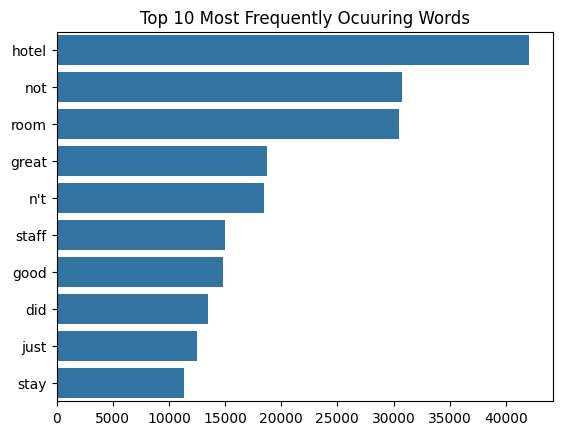

In [ ]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Frequently Ocuuring Words')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
bigrams= cv.fit_transform(df['Review'])